[Github-ultralytics](https://github.com/ultralytics/ultralytics)

[YOLOv8 Docs](https://docs.ultralytics.com/tasks/detect/)

In [3]:
!nvidia-smi

Mon Apr 10 01:00:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8     7W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
"""from roboflow import Roboflow
rf = Roboflow(api_key="***") #*** Đã ẩn
project = rf.workspace("nam-hai-xqnqq").project("biensoxe-xir0n")
dataset = project.version(1).download("yolov8")"""

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.69  Python-3.10.3 torch-1.13.0+cpu CPU
Setup complete  (16 CPUs, 15.4 GB RAM, 294.1/457.3 GB disk)


In [ ]:
# Test
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg' save = True

Ultralytics YOLOv8.0.69  Python-3.10.3 torch-1.13.0+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


  0%|          | 0.00/476k [00:00<?, ?B/s]
 24%|██▎       | 112k/476k [00:00<00:00, 1.01MB/s]
100%|██████████| 476k/476k [00:00<00:00, 2.44MB/s]
image 1/1 C:\Users\truon\OneDrive\Desktop\License_Plate_Detection\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 106.4ms
Speed: 1.0ms preprocess, 106.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


In [6]:
%cd /content/drive/MyDrive/Yolov8

/content/drive/MyDrive/Yolov8


### Huấn luyện

In [10]:
# train with CLI
"""
TASK (tùy chọn) là một trong những tệp . Nếu nó không được thông qua rõ ràng, YOLOv8 sẽ cố gắng đoán từ loại mô hình.[detect, segment, classify]TASK
MODE (bắt buộc) là một trong những [train, val, predict, export, track]
"""
!yolo task=detect mode=train data=BienSoXe/data.yaml model=yolov8n.pt epochs=200 imgsz=640

Ultralytics YOLOv8.0.69 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=BienSoXe/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, wor

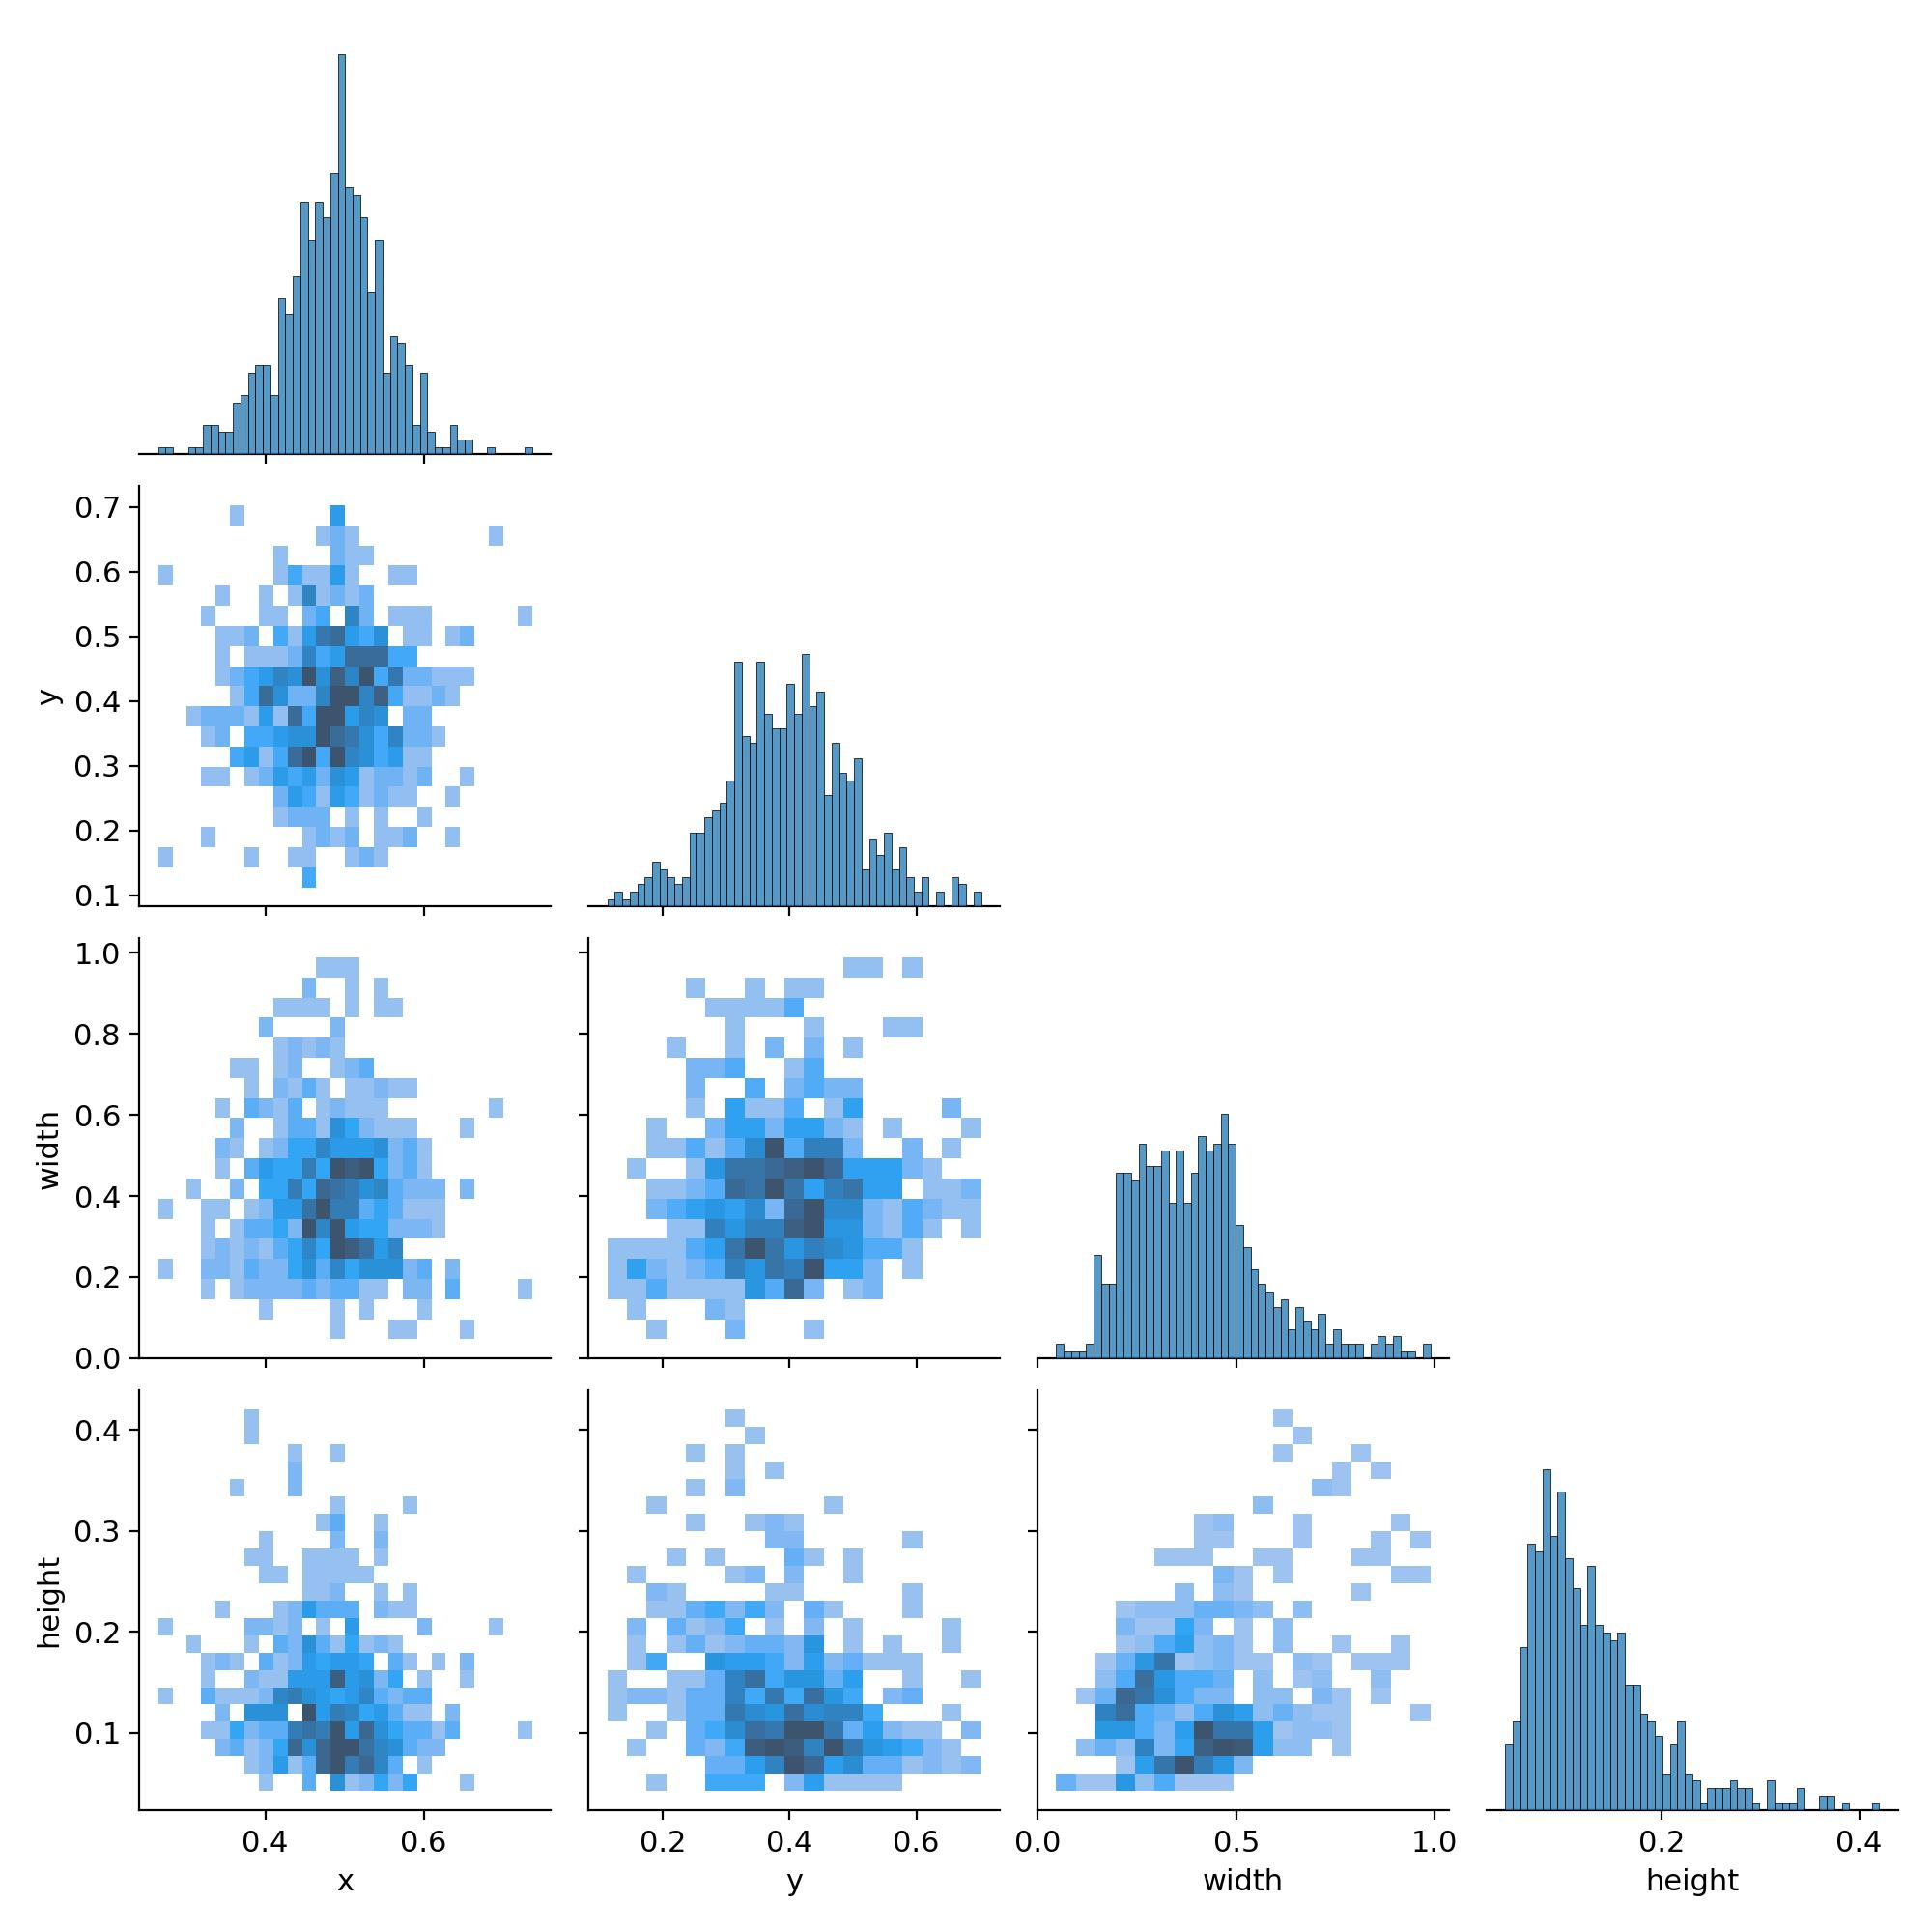

In [8]:
from IPython.display import display, Image
Image(filename='C:/Users/truon/OneDrive/Desktop/License_Plate_Detection/Yolov8/runs/detect/train/labels_correlogram.jpg', width=600)

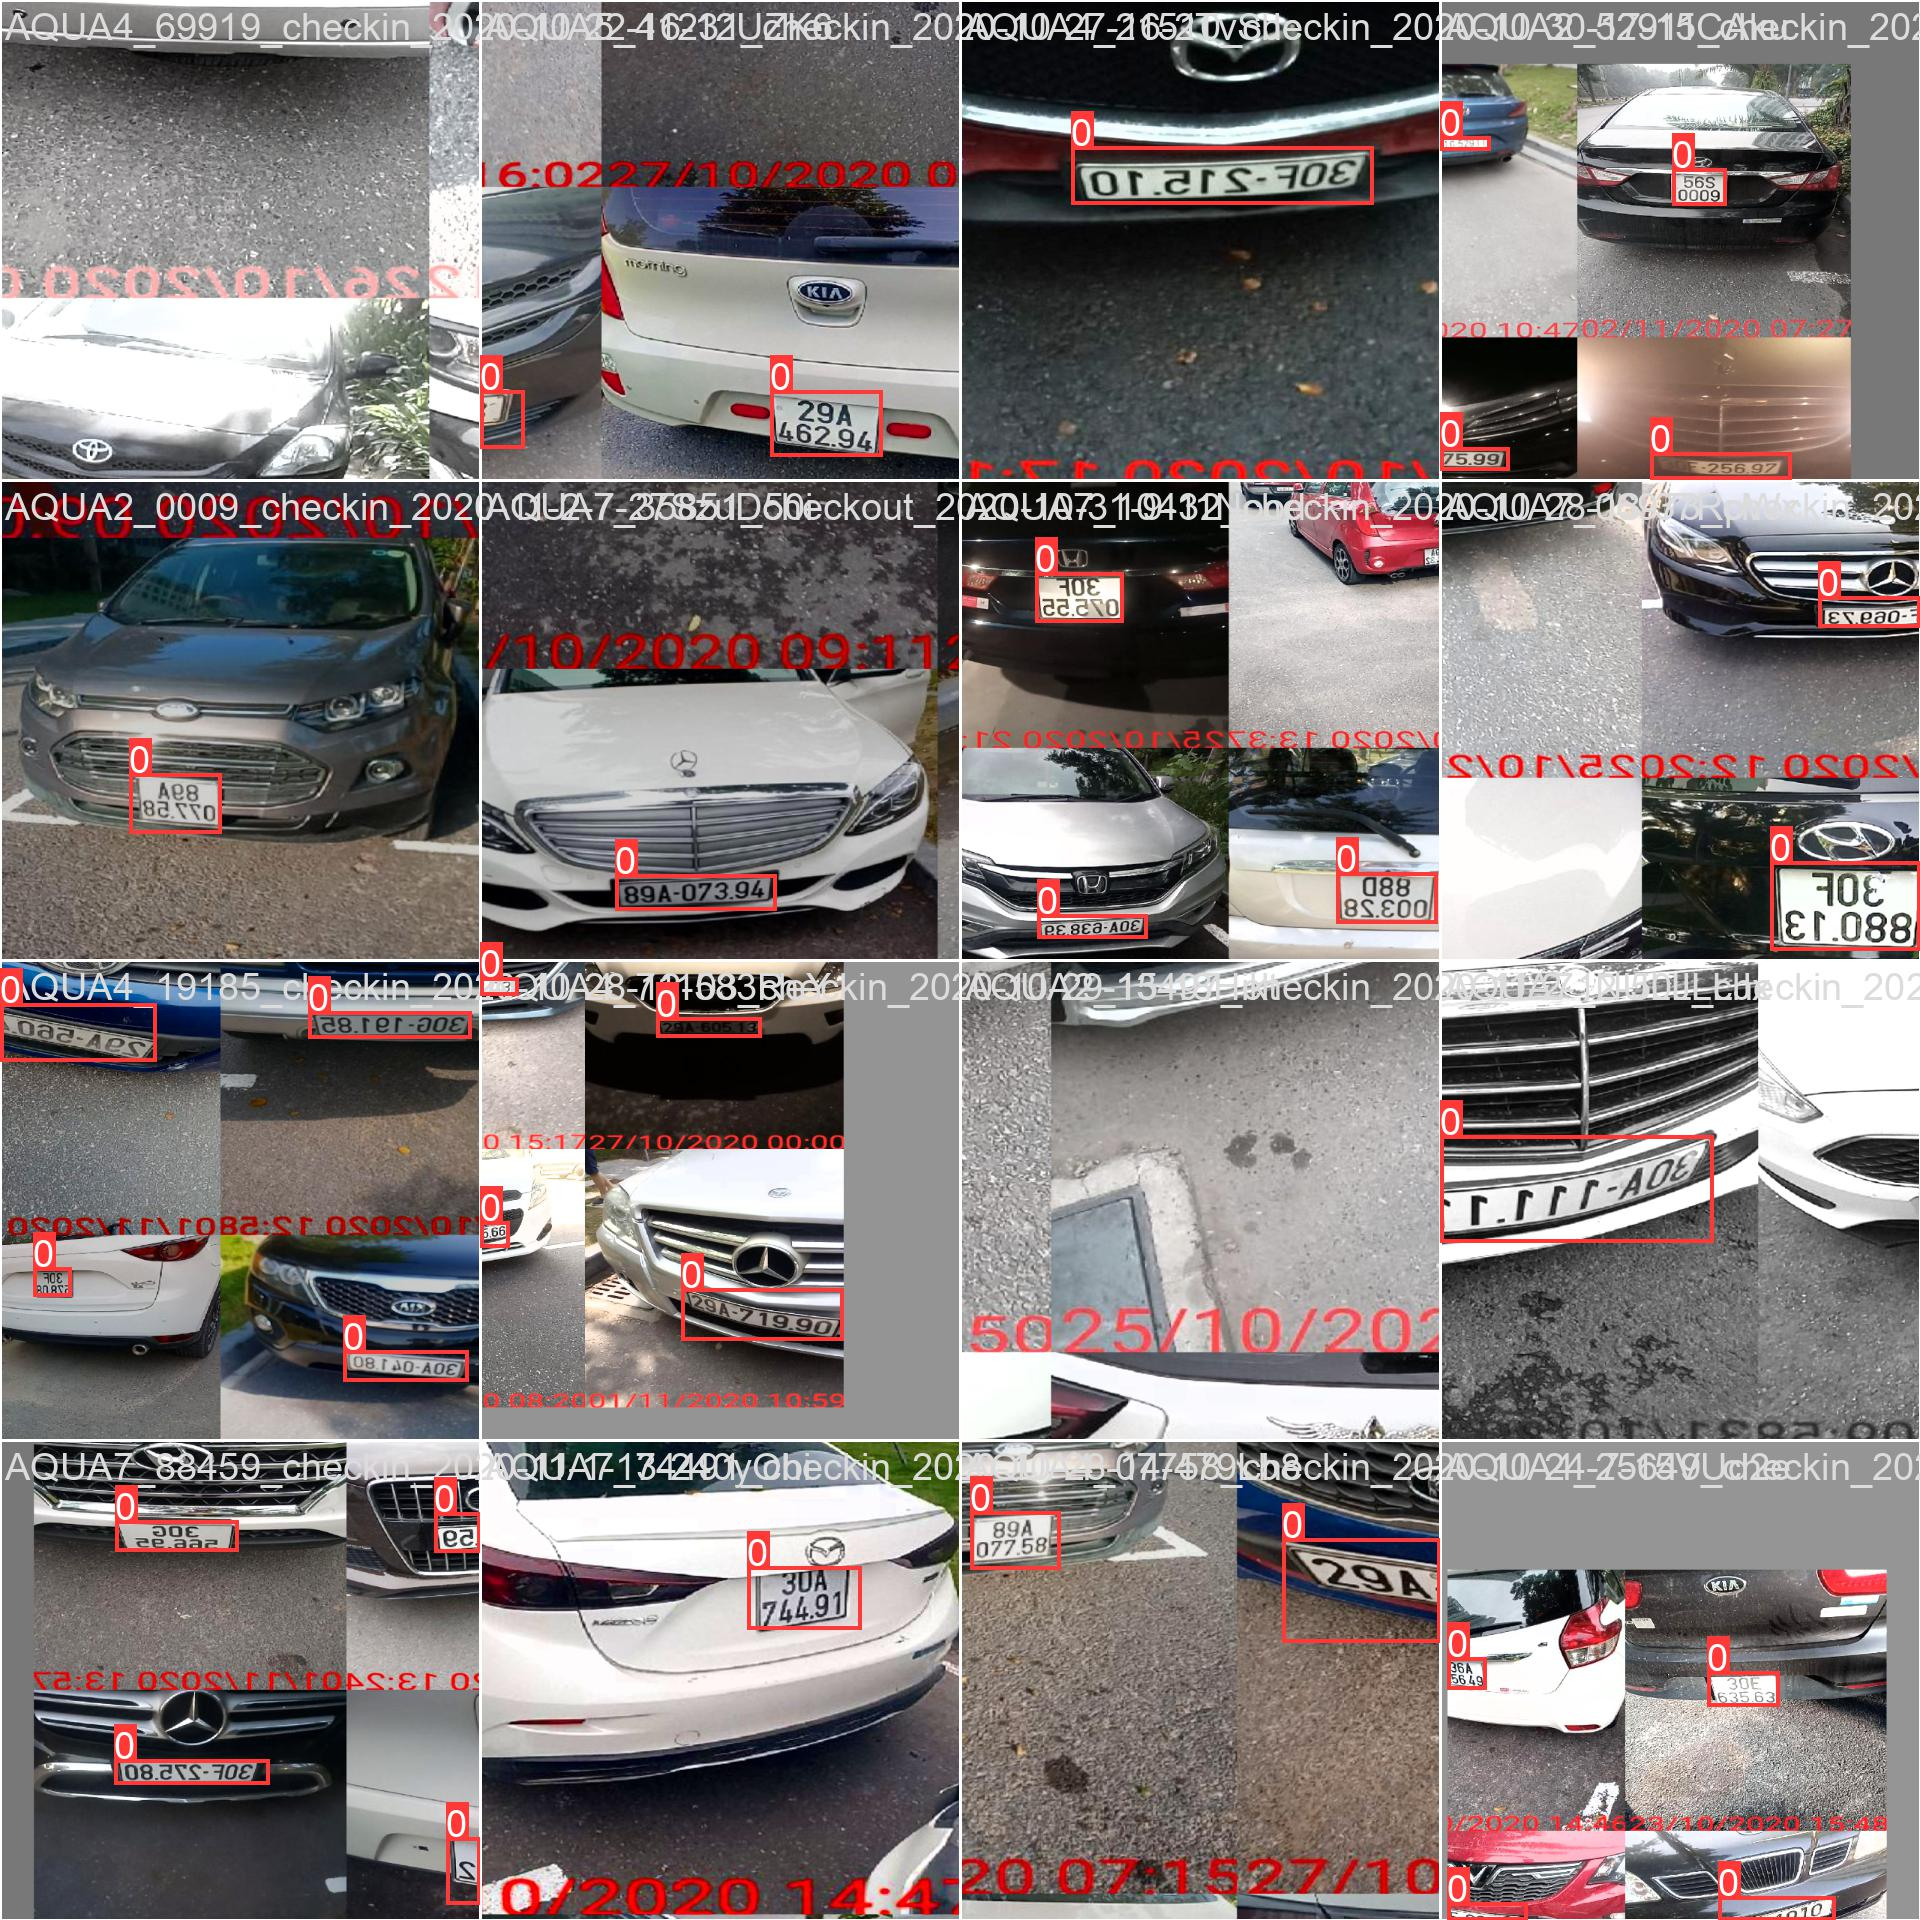

In [9]:
Image(filename='C:/Users/truon/OneDrive/Desktop/License_Plate_Detection/Yolov8/runs/detect/train/train_batch2.jpg', width=600)

### Detect

In [13]:
!yolo detect predict model=best.pt source='anh_test_6.jpg'

Ultralytics YOLOv8.0.71  Python-3.9.1 torch-2.0.0+cpu CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 C:\Users\truon\OneDrive\Desktop\License_Plate_Detection\Yolov8\anh_test_6.jpg: 640x512 2 BienSoXes, 100.3ms
Speed: 1.0ms preprocess, 100.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


### Tracking

In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO('C:/Users/truon/OneDrive/Desktop/License_Plate_Detection/Yolov8/best.pt')
# Track with the model
results = model.track(source="IMG_3632.mp4", show=True)

In [ ]:
!yolo track model=C:/Users/truon/OneDrive/Desktop/License_Plate_Detection/Yolov8/best.pt source="IMG_3632.mp4" show=True

### Xuất model

In [7]:
from ultralytics import YOLO
model = YOLO('best.pt')
model.export(format='onnx')

Ultralytics YOLOv8.0.69  Python-3.10.3 torch-1.13.0+cpu CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from C:\Users\truon\OneDrive\Desktop\License_Plate_Detection\Yolov8\best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (23.4 MB)

ONNX: starting export with onnx 1.12.0 opset 16...
ONNX: export success  0.7s, saved as C:\Users\truon\OneDrive\Desktop\License_Plate_Detection\Yolov8\best.onnx (11.7 MB)

Export complete (1.0s)
Results saved to C:\Users\truon\OneDrive\Desktop\License_Plate_Detection\Yolov8
Predict:         yolo predict task=detect model=C:\Users\truon\OneDrive\Desktop\License_Plate_Detection\Yolov8\best.onnx imgsz=640 
Validate:        yolo val task=detect model=C:\Users\truon\OneDrive\Desktop\License_Plate_Detection\Yolov8\best.onnx imgsz=640 data=BienSoXe/data.yaml 
Visualize:       https://netron.app


'C:\\Users\\truon\\OneDrive\\Desktop\\License_Plate_Detection\\Yolov8\\best.onnx'